## Challenge - Diabetes Classification
### Diabetes Challenge!
#### Machine Learning in Health

Diabetes is a condition that impairs the body's ability to process blood glucose, otherwise known as blood sugar. In the United States, the estimated number of people over 18 years of age with diagnosed and undiagnosed diabetes is 30.2 million. The figure represents between 27.9 and 32.7 percent of the population.

Without ongoing, careful management, diabetes can lead to a buildup of sugars in the blood, which can increase the risk of dangerous complications, including stroke and heart disease.

Different kinds of diabetes can occur, and managing the condition depends on the type. Not all forms of diabetes stem from a person being overweight or leading an inactive lifestyle. In fact, some are present from childhood.

##### Challenge

In this problem you are given a Diabetes Data set consisting of following features -

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

and your task is to predict whether a person is suffering from diabetes or not (Binary Classification)

##### Tasks

1) Plot a bar graph showing number of classes and no of examples in each class.

2) Classification Task, classify a person as 0 or 1 (Diabetic or Not) using K-Nearest Neighbors classifier.

Download the training data set and submit your predictions as .csv for the Test cases given below. Sample Output file is provided

#### GItHub Account

https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/Datasets/MNIST-2/mnist_train.csv



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
dfx = pd.read_csv('Training Data/Diabetes_XTrain.csv')
dfy = pd.read_csv('Training Data/Diabetes_YTrain.csv')

In [72]:
dfx
# 	Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [73]:
dfy

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [177]:
dfx=dfx.drop(columns=['BMI'])

In [178]:
X = dfx.values
Y = dfy.values
Y = Y.reshape((-1,))

print(X.shape, Y.shape)

(576, 7) (576,)


In [179]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
print(x_mean)
print(x_std)

X = (X - x_mean) / x_std
print(X.shape)

[  3.75868056 119.97569444  68.82638889  20.36458333  76.16666667
   0.4815191   32.95486111]
[  3.32589185  31.48554727  20.2681948   15.88005374 109.09872249
   0.3366177   11.8678214 ]
(576, 7)


In [180]:
import seaborn as sns

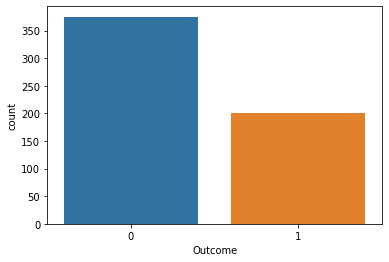

In [181]:
sns.countplot(x='Outcome', data=dfy)
plt.show()

In [182]:
dfx_test = pd.read_csv('Diabetes_Xtest.csv')

In [184]:
dfx_test=dfx_test.drop(columns=['BMI'])

In [185]:
X_test = dfx_test.values
print(X_test.shape)

(192, 7)


In [187]:
x_mean = X_test.mean(axis=0)
x_std = X_test.std(axis=0)
print(x_mean)
print(x_std)

X_test = (X_test - x_mean) / x_std
print(X_test.shape)

[-7.40148683e-17 -1.52655666e-16  3.19189120e-16  1.29526020e-16
 -6.01370805e-17  1.98914959e-16 -1.89663100e-16]
[1. 1. 1. 1. 1. 1. 1.]
(192, 7)


In [188]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, query, k=55):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query, X[i])
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)   # now vals has become the 2-D array
#     print(vals)    
    new_vals = vals[:, 1]
#     print(new_vals)
    new_vals = np.unique(new_vals, return_counts=True)
#     print(new_vals)
#     new_vals   is like   (array([0., 1.]), array([3, 2], dtype=int64))
    
    index = new_vals[1].argmax()   # it finds the index of max number 
    pred = new_vals[0][index]
    pred = int(pred)
    return pred  
    

In [189]:
num = knn(X, Y, X_test[78])
print(num)

0


    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(query, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals) # now vals is a 2-D array
    
    new_vals = vals[:, 1]
    print(new_vals)
    new_vals = np.unique(new_vals, return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    pred = int(pred)
    return pred

In [190]:
pred = np.zeros((X_test.shape[0]))
print(pred.shape)

(192,)


In [191]:
X

array([[ 9.74571511e-01,  1.52528095e+00,  9.45995009e-01, ...,
         2.24414482e+00,  9.07500999e-01,  5.93633714e-01],
       [ 1.27524274e+00, -3.16834081e-01,  3.53934388e-01, ...,
        -6.98144441e-01, -7.26399991e-01,  2.11034006e+00],
       [ 9.74571511e-01,  8.58308268e-01,  3.53934388e-01, ...,
        -6.98144441e-01, -6.66985409e-01,  8.46418104e-01],
       ...,
       [-5.28784649e-01,  6.42931672e-02, -4.35479774e-01, ...,
         2.73452637e-01,  6.99549964e-01, -9.23072630e-01],
       [ 7.25578147e-02,  1.08063250e+00,  1.56580847e-01, ...,
         4.56772840e-01, -4.26356354e-01,  3.40849323e-01],
       [-8.29455882e-01, -1.01556737e+00,  4.52611158e-01, ...,
        -1.52766836e-03, -3.46146670e-01, -3.33242385e-01]])

In [206]:
m = X_test.shape[0]
for i in range(m):
    pred[i] = knn(X, Y, X_test[i], 40)
print(pred)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [207]:
print(X_test.shape)

(192, 7)


In [208]:
new_df = pd.DataFrame(pred, dtype='int32', columns=['Outcome'])

In [209]:
new_df

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,0
190,0


In [203]:
new_df.to_csv("Output2.csv", index=False)

In [210]:
np.sum(pred)

36.0

In [205]:
np.sum(Y)

201